In [ ]:
import pandas as pd
df=pd.read_csv("House Price India.csv")
print(df.head())
print(df.tail())
print(df.shape)
print(df.columns)

           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810635  42491                   4                 2.50         2920   
1  6762810998  42491                   5                 2.75         2910   
2  6762812605  42491                   4                 2.50         3310   
3  6762812919  42491                   3                 2.00         2710   
4  6762813105  42491                   3                 2.50         2600   

   lot area  number of floors  waterfront present  number of views  \
0      4000               1.5                   0                0   
1      9480               1.5                   0                0   
2     42998               2.0                   0                0   
3      4500               1.5                   0                0   
4      4750               1.0                   0                0   

   condition of the house  grade of the house  \
0                       5                   8   
1           

In [ ]:
print(df.isnull().sum())

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

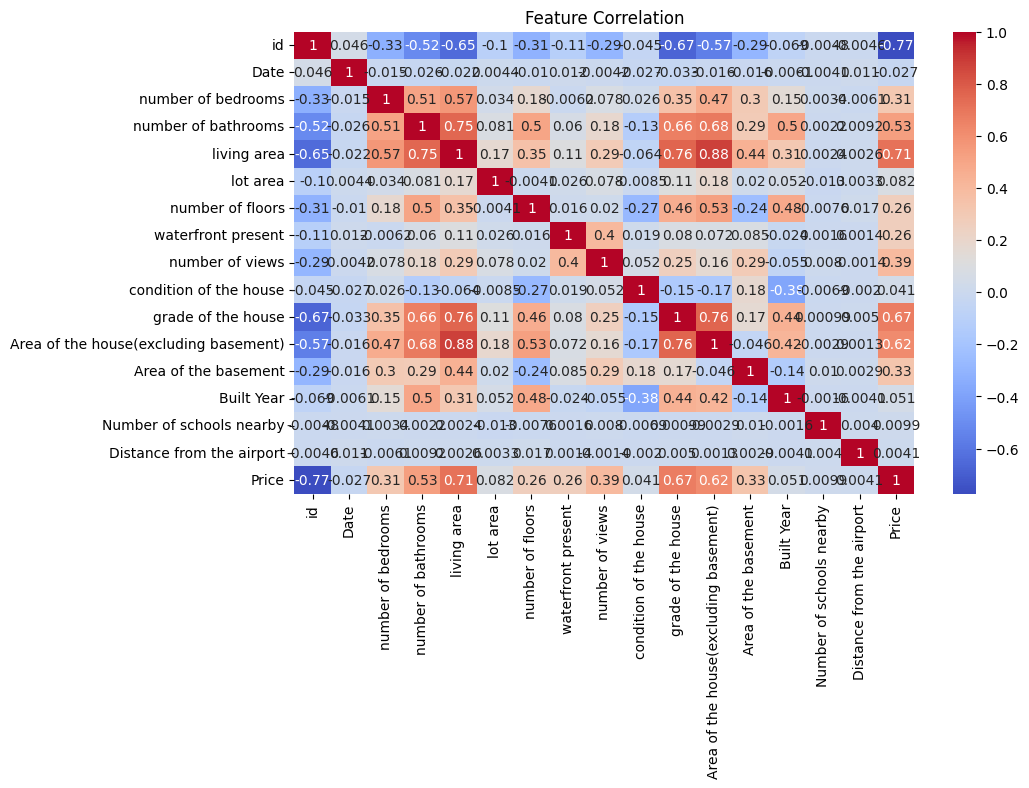

In [ ]:
# See distribution of target variable (if any, e.g. 'Survived')
if 'Survived' in df.columns:
    sns.countplot(x='Survived', data=df)
    plt.title('Target Variable Distribution')
    plt.show()

# Correlation heatmap of numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

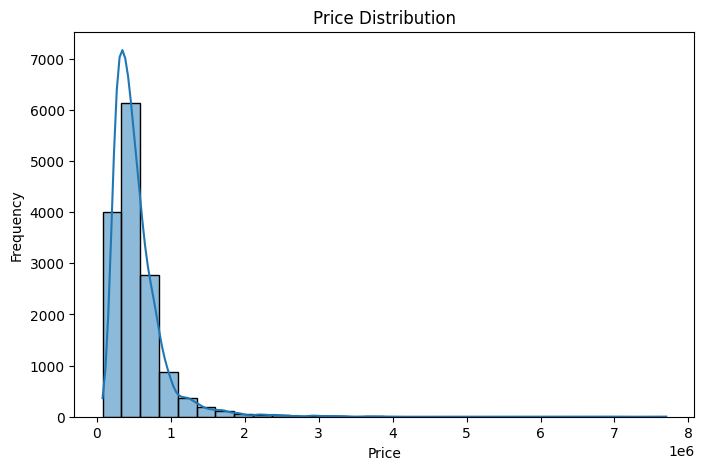

In [ ]:
# Visualize Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()




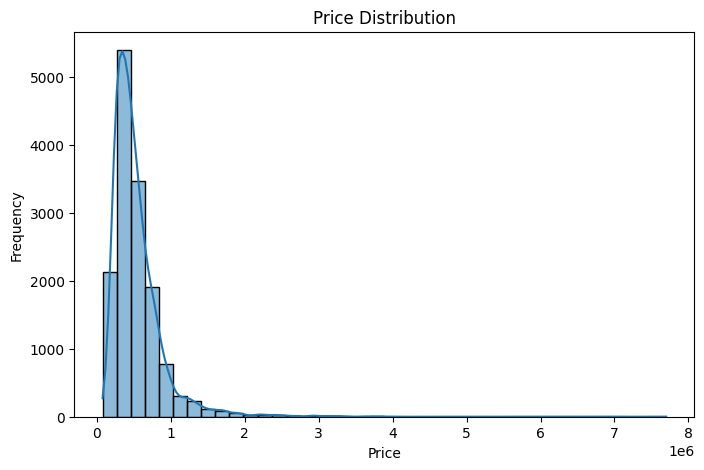

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=40, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor  # Import the XGBoost regressor

# Assume df is your loaded DataFrame
# Drop non-feature columns
X = df.drop(columns=['id', 'Date', 'Price'])
y = df['Price']

# Identify column types
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessors
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# For XGBoost, one-hot encoding is not strictly necessary for many cases,
# but it's a safe and standard practice.
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    [
        ('num', numeric_transformer, numeric_cols),
        ('cat', cat_transformer, cat_cols)
    ],
    remainder='passthrough'  # Keep any columns not in num or cat
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

!pip install xgboost

from xgboost import XGBRegressor

xgb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")


RMSE: 191477.68
MAE: 121106.04
R² Score: 0.7523


In [ ]:
import pickle
# Save the model to a .pkl file
file_path = 'my_house_price_model.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(xgb_model, file)

print(f"Model successfully saved to '{file_path}'")

Model successfully saved to 'my_house_price_model.pkl'
